In [82]:
import os

import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [39]:
 print("Process Started\n")

Process Started



In [97]:

timeWindow = [1,3, 7]


In [99]:
stat_data = pd.DataFrame(
        columns=['network', 'timeframe', 'start_date', 'num_nodes', 'num_edges','max-degree', 'density', 'diameter',
                 'avg_shortest_path_length', 'degree_centrality',
                 'closeness_centrality', 'betweenness_centrality', 'eigenvector_centrality', 'pagerank',
                 'assortativity', 'clique_number', 'motifs'])


In [50]:
    def parse_network_chunk(file_path):
        files = os.listdir(file_path)
        for file in files:
            print("Processing {}".format(file))
            selectedNetwork = pd.read_csv((file_path +'\\' + file), sep=' ', names=["from", "to", "date", "value"])
            selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')

            for timeFrame in timeWindow:
                print("\nProcessing Timeframe{}".format(timeFrame))
                transactionGraphs = nx.DiGraph()
                # select only the rows that fall within the first 7 days
                start_date = selectedNetwork['date'].min()
                end_date = start_date + dt.timedelta(days=timeFrame)
                selectedNetworkInTimeFrame = selectedNetwork[
                    (selectedNetwork['date'] >= start_date) & (selectedNetwork['date'] < end_date)]

                # Populate graph with edges
                for item in selectedNetworkInTimeFrame.to_dict(orient="records"):
                    transactionGraphs.add_edge(item["from"], item["to"], value=item["value"])

                num_nodes = len(transactionGraphs.nodes())
                num_edges = len(transactionGraphs.edges())
                density = nx.density(transactionGraphs)
                try:
                    diameter = nx.diameter(transactionGraphs)
                except Exception as e:
                    diameter = "NC"

                try:
                    avg_shortest_path_length = nx.average_shortest_path_length(transactionGraphs)
                except Exception as e:
                    avg_shortest_path_length = "NC"

                degree_centrality = nx.degree_centrality(transactionGraphs)
                closeness_centrality = nx.closeness_centrality(transactionGraphs)
                betweenness_centrality = nx.betweenness_centrality(transactionGraphs)
                eigenvector_centrality = nx.eigenvector_centrality(transactionGraphs)
                pagerank = nx.pagerank(transactionGraphs)
                assortativity = nx.degree_assortativity_coefficient(transactionGraphs)
                try:
                    clique_number = nx.graph_clique_number(transactionGraphs)
                except Exception as e:
                    clique_number = "NC"
                # motifs = nx.algorithms.community.kernighan_lin_bisection(transactionGraphs, weight='weight')

                try:
                    degree_sequence = sorted([d for n, d in transactionGraphs.degree()], reverse=True)
                    # print "Degree sequence", degree_sequence
                    dmax = max(degree_sequence)
                except Exception as e:
                    dmax = "-"
                stats = {'network': file, 'timeframe': timeFrame, 'start_date': start_date, 'num_nodes': num_nodes,
                         'num_edges': num_edges,'max-degree':dmax, 'density': density, 'diameter': diameter,
                         'avg_shortest_path_length': "-", 'degree_centrality': "-",
                         'closeness_centrality': "-", 'betweenness_centrality': "-",
                         'eigenvector_centrality': "-", 'pagerank': "-",
                         'assortativity': assortativity, 'clique_number': clique_number, 'motifs': "-"}

                stat_data = stat_data.append(stats, ignore_index=True)
                fig = plt.figure(figsize=(60, 60))
                nx.draw(transactionGraphs, node_size=5,arrowsize=8)
                plt.savefig( file + "_" + str(timeFrame) + "_" + ".png")




    
            

In [98]:
file_path = "D:\\PersonalProject\\GNNDataDummy"
files = os.listdir(file_path)
files

['networkbitcoinereum.txt',
 'networkethgas.txt',
 'networktoken1369.txt',
 'networktoken1452.txt',
 'networktoken1529.txt',
 'networktoken155.txt',
 'networktoken1591.txt',
 'networktoken1609.txt',
 'networktoken1618.txt',
 'networktoken1621.txt',
 'networktoken1632.txt',
 'networktoken1645.txt',
 'networktoken1667.txt',
 'networktoken1677.txt',
 'networktoken1683.txt',
 'networktoken172.txt',
 'networktoken173.txt',
 'networktoken175.txt',
 'networktoken449.txt',
 'networktoken518.txt',
 'networktoken673.txt',
 'networktoken702.txt',
 'networktoken722.txt',
 'networktoken735.txt',
 'networktoken796.txt',
 'networktoken804.txt',
 'networktoken845.txt',
 'networktoken882.txt',
 'networktoken915.txt',
 'networktoken962.txt']

Processing networkbitcoinereum.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networkethgas.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1369.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1452.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1529.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken155.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1591.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(60, 60))


Processing networktoken1609.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1618.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1621.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1632.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1645.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1667.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1677.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken1683.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken172.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken173.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken175.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken449.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken518.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken673.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken702.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken722.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken735.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken796.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken804.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken845.txt

Processing Timeframe1


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken882.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken915.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


Processing networktoken962.txt

Processing Timeframe1


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe3


D:\Anaconda\lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)



Processing Timeframe7


C:\Users\ACER\AppData\Local\Temp\ipykernel_30496\417472042.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stat_data = stat_data.append(stats, ignore_index=True)


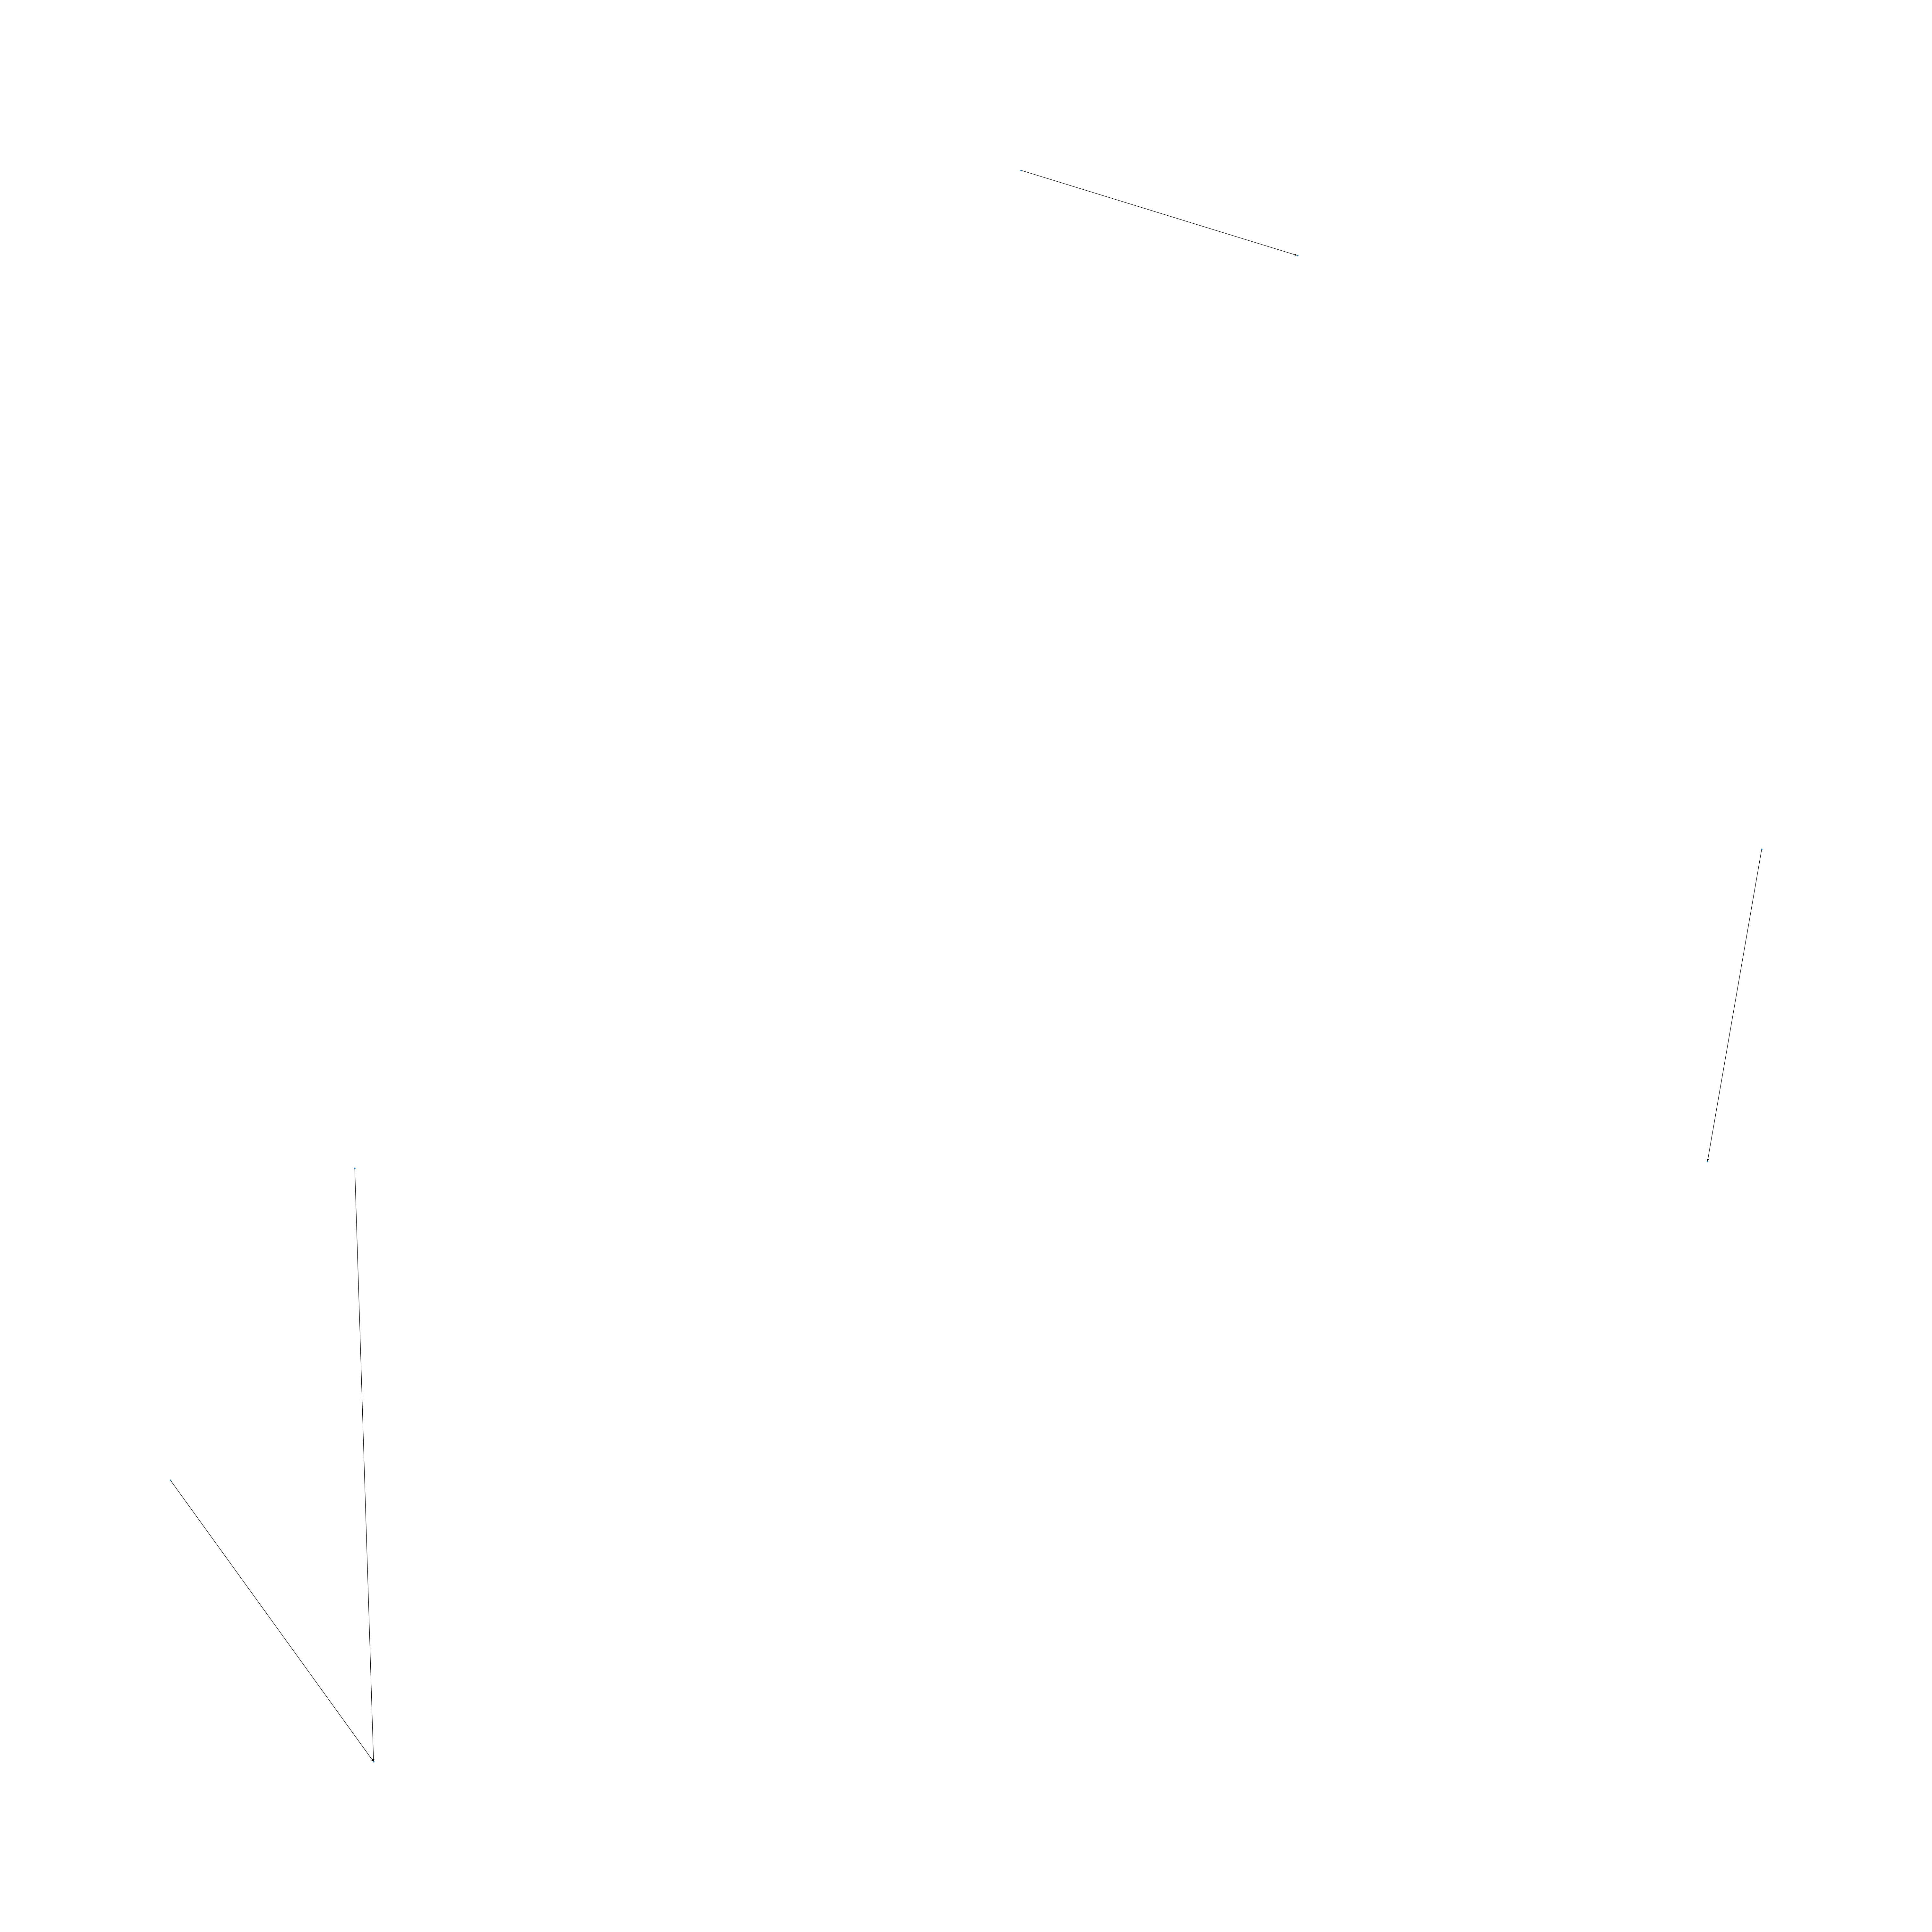

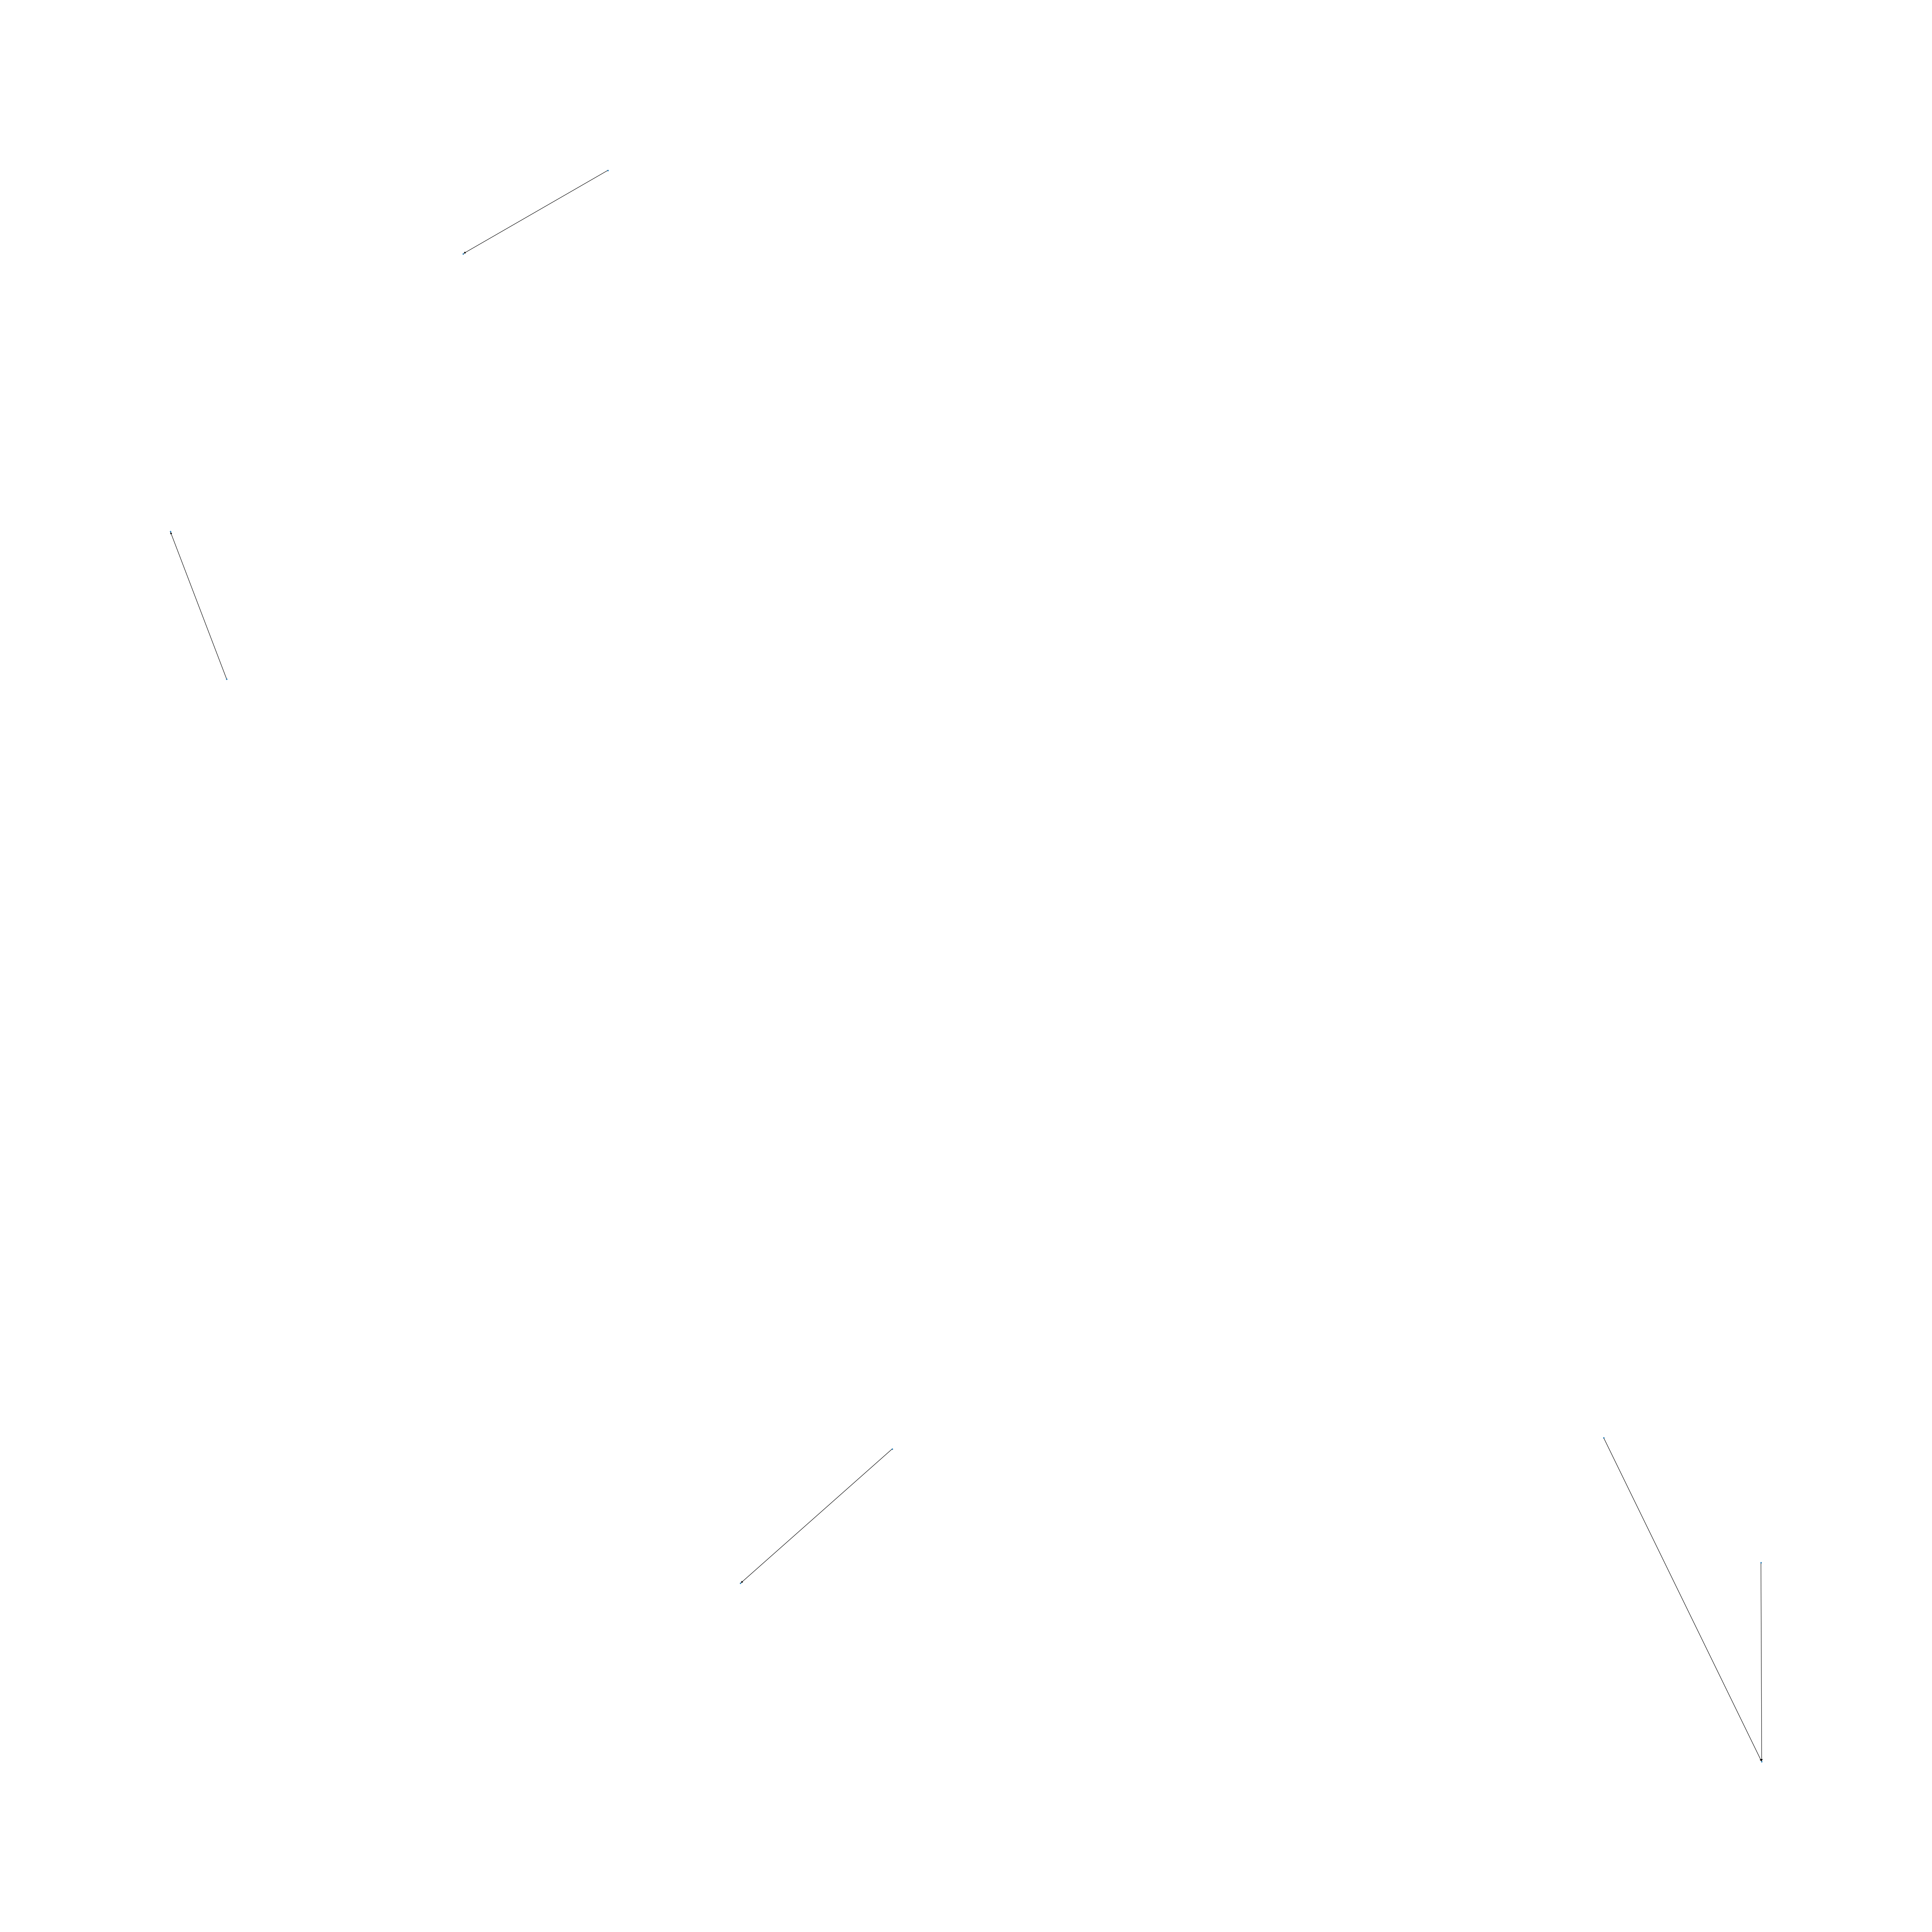

MemoryError: 

<Figure size 6000x6000 with 1 Axes>

MemoryError: In RendererAgg: Out of memory

<Figure size 6000x6000 with 1 Axes>

In [ ]:
    for file in files:
        print("Processing {}".format(file))
        selectedNetwork = pd.read_csv((file_path +'\\' + file), sep=' ', names=["from", "to", "date", "value"])
        selectedNetwork['date'] = pd.to_datetime(selectedNetwork['date'], unit='s')

        for timeFrame in timeWindow:
            print("\nProcessing Timeframe{}".format(timeFrame))
            transactionGraphs = nx.DiGraph()
            # select only the rows that fall within the first 7 days
            start_date = selectedNetwork['date'].min()
            end_date = start_date + dt.timedelta(days=timeFrame)
            selectedNetworkInTimeFrame = selectedNetwork[
                (selectedNetwork['date'] >= start_date) & (selectedNetwork['date'] < end_date)]

            # Populate graph with edges
            for item in selectedNetworkInTimeFrame.to_dict(orient="records"):
                transactionGraphs.add_edge(item["from"], item["to"], value=item["value"])

            num_nodes = len(transactionGraphs.nodes())
            num_edges = len(transactionGraphs.edges())
            density = nx.density(transactionGraphs)
            try:
                diameter = nx.diameter(transactionGraphs)
            except Exception as e:
                diameter = "NC"

            try:
                avg_shortest_path_length = nx.average_shortest_path_length(transactionGraphs)
            except Exception as e:
                avg_shortest_path_length = "NC"
            
            try:
                degree_centrality = nx.degree_centrality(transactionGraphs)
            except Exception as e:
                degree_centrality = "-"
            
            try:
                closeness_centrality = nx.closeness_centrality(transactionGraphs)
            except Exception as e:
                closeness_centrality = "-"
            
            try:
                betweenness_centrality = nx.betweenness_centrality(transactionGraphs)
            except Exception as e:
                betweenness_centrality = "-"
            
            try:
                eigenvector_centrality = nx.eigenvector_centrality(transactionGraphs)
            except Exception as e:
                eigenvector_centrality = "-"
                
            try:
                pagerank = nx.pagerank(transactionGraphs)
            except Exception as e:
                pagerank = "-"
            
            try:
                assortativity = nx.degree_assortativity_coefficient(transactionGraphs)
            except Exception as e:
                assortativity = "-"
           
            assortativity = nx.degree_assortativity_coefficient(transactionGraphs)
            try:
                clique_number = nx.graph_clique_number(transactionGraphs)
            except Exception as e:
                clique_number = "NC"
            # motifs = nx.algorithms.community.kernighan_lin_bisection(transactionGraphs, weight='weight')
            
            try:
                degree_sequence = sorted([d for n, d in transactionGraphs.degree()], reverse=True)
                # print "Degree sequence", degree_sequence
                dmax = max(degree_sequence)
            except Exception as e:
                dmax = "-"

            stats = {'network': file, 'timeframe': timeFrame, 'start_date': start_date, 'num_nodes': num_nodes,
                     'num_edges': num_edges,'max-degree':dmax, 'density': density, 'diameter': diameter,
                     'avg_shortest_path_length': "-", 'degree_centrality': "-",
                     'closeness_centrality': "-", 'betweenness_centrality': "-",
                     'eigenvector_centrality': "-", 'pagerank': "-",
                     'assortativity': assortativity, 'clique_number': clique_number, 'motifs': "-"}

            stat_data = stat_data.append(stats, ignore_index=True)
            fig = plt.figure(figsize=(60, 60))
            nx.draw(transactionGraphs, node_size=5,arrowsize=8)
            plt.savefig( file + "_" + str(timeFrame) + "_" + ".png")



          
    

In [101]:
# stat_data.to_csv("final_data.csv")
stat_data.to_csv("final_data.csv")
print("\nFinisheng processing {} \n".format(file + "   " + str(timeFrame)))


Finisheng processing networktoken962.txt   7 

